In [102]:
%load_ext autoreload
%autoreload 2

import Advan_operator as ad_op    
import pandas as pd
import os
import random
import sqlite3 
import numpy as np
import json

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
os.getcwd()

'D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\Wild_fire\\Python_code'

# Introduction

This notebook aims to convert the monthly neighborhood patterns data to hourly population map.

# Load data

In [59]:
# month_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'
sqlite_fname = r'D:\Research_data\Wild_fire\Neighborhood_202306.db'

## Load monthly neighborhood patterns

In [11]:

month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], verbose=True)
month_df

Found target files: 22
The top 5 and bottom 5 files:
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\data_01af1467-0604-be6e-0043-0b8700e85436_53_1_0.csv.gz
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\data_01af1467-0604-be6e-0043-0b8700e85436_53_1_1.csv.gz
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\data_01af1467-0604-be6e-0043-0b8700e85436_53_1_10.csv.gz
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\data_01af1467-0604-be6e-0043-0b8700e85436_53_1_2.csv.gz
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\data_01af1467-0604-be6e-0043-0b8700e85436_53_1_3.csv.gz
...
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\Neighborhood_Patterns_US-658-DATE_RANGE_START-2023-06-01.csv.gz
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\Neighborhood_Patterns_US-659-DATE_RANGE_START-2023-06-01.csv.gz
K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01\Neighborhood_Patterns_US-660-DATE_RANGE_START-

AREA           AREA_TYPE    ORIGIN_AREA_TYPE  \
0      470370112006  Census Block Group  Census Block Group   
1      310199694003  Census Block Group  Census Block Group   
2      550939606003  Census Block Group  Census Block Group   
3      450770112042  Census Block Group  Census Block Group   
4       60375545222  Census Block Group  Census Block Group   
...             ...                 ...                 ...   
20952   60375433211  Census Block Group  Census Block Group   
20953  390375701021  Census Block Group  Census Block Group   
20954  201259509002  Census Block Group  Census Block Group   
20955  550790190003  Census Block Group  Census Block Group   
20956  540879631003  Census Block Group  Census Block Group   

              DATE_RANGE_START           DATE_RANGE_END  \
0      2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
1      2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
2      2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
3      2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
4      2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
...                        ...                      ...   
20952  2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
20953  2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
20954  2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
20955  2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   
20956  2023-06-01 00:00:00.000  2023-07-01 00:00:00.000   

                                              DAY_COUNTS  RAW_STOP_COUNTS  \
0      {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...             6558   
1      {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...            42090   
2      {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...            33042   
3      {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...            11249   
4      {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...            14560   
...                                                  ...              ...   
20952  {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...            76304   
20953  {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...            12605   
20954  {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...            26633   
20955  {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...             4628   
20956  {"Monday":4,"Tuesday":4,"Wednesday":4,"Thursda...             5960   

       RAW_DEVICE_COUNTS                                       STOPS_BY_DAY  \
0                   4181  [208,162,223,224,92,215,261,174,260,218,326,15...   
1                   8019  [1842,1829,1559,1210,1200,1150,1338,1712,1755,...   
2                   4781  [1594,1195,789,1047,930,927,726,928,1295,1130,...   
3                   3083  [280,354,256,461,475,677,451,321,401,479,187,2...   
4                   6277  [313,430,408,450,351,886,451,358,432,808,613,2...   
...                  ...                                                ...   
20952              13849  [2619,2600,2303,1380,3382,2773,2634,2639,2966,...   
20953               1413  [241,129,294,223,215,303,204,457,451,513,344,3...   
20954               4948  [958,1126,1618,804,807,995,980,1092,1460,705,5...   
20955               1532  [142,92,79,77,133,149,173,175,280,127,78,132,1...   
20956                931  [64,144,188,154,112,162,168,199,141,171,69,143...   

                                      STOPS_BY_EACH_HOUR  ...  \
0      [0,0,0,0,0,0,0,0,22,22,39,6,14,26,28,0,7,10,5,...  ...   
1      [0,10,17,23,51,16,89,56,90,133,116,174,183,106...  ...   
2      [0,0,5,42,74,42,23,59,82,145,70,72,81,71,64,11...  ...   
3      [42,0,0,0,0,0,10,28,16,0,17,14,8,36,11,14,0,51...  ...   
4      [0,0,0,0,0,14,0,0,0,24,0,36,22,22,0,17,37,0,96...  ...   
...                                                  ...  ...   
20952  [0,39,38,24,0,43,60,329,241,138,211,172,158,21...  ...   
20953  [0,0,0,0,0,0,0,0,15,26,9,0,7,13,39,6,14,0,23,1...  ...   
20954  [5,0,0,0,8,8,39,50,85,55,36,28,59,132,41,82,61...  ...   
20955  [15,0,0,0,0,0,0,0,

In [18]:
print("Canada area count (should be 0):")
month_df['AREA'].astype(str).str.startswith("CA").sum()

Canada area count (should be 0):


0

In [21]:
# fill the leading zero
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)

## Load CBG list

In [76]:
CGB_list_df = pd.read_csv(CBG_list_fname, dtype={'GEOID':str}).rename(columns={"GEOID":"CBG"})
CGB_list_df['CBG_index'] = CGB_list_df.index
# CGB_list_df = CGB_list_df.reset_index()
CGB_list_df

CBG  CBG_index
0       010010201001          0
1       010010201002          1
2       010010202001          2
3       010010202002          3
4       010010203001          4
...              ...        ...
220328  721537506011     220328
220329  721537506012     220329
220330  721537506013     220330
220331  721537506021     220331
220332  721537506022     220332

[220333 rows x 2 columns]

In [78]:
CBG_dict = CGB_list_df.reset_index().set_index('CBG')['CBG_index'].to_dict()
print("10 randoms items:")
random.sample(list(CBG_dict.items()), 10)

10 randoms items:


[('060190052043', 12715),
 ('490439643073', 199990),
 ('540390123003', 211876),
 ('360050004003', 127978),
 ('060855029013', 30173),
 ('391419564002', 157413),
 ('120150104021', 42226),
 ('060710108043', 26248),
 ('390950048001', 155604),
 ('271450109003', 107577)]

# Create Neighborhood patterns tables

In [62]:
# create patterns table
ad_op.create_neighborhood_patterns_table(sqlite_fname=sqlite_fname, np_df=month_df)

In [80]:
# creat CBG index table
# ad_op.create_neighborhood_CBG_index_table(sqlite_fname=sqlite_fname, np_df=month_df)
conn = sqlite3.connect(sqlite_fname)
curs = conn.cursor()
CGB_list_df.set_index('CBG').to_sql('CBG_index', conn, if_exists='replace')
sql = f'CREATE INDEX CBG_index_idx ON CBG_index(CBG_index);'
curs.execute(sql)
conn.close()

## create device_home_area table

In [83]:
# create device_home_area table
ad_op.create_device_home_areas_table(sqlite_fname=sqlite_fname)

In [86]:
# update device_home_area table
# Need a SSD. 
ad_op.split_neighorhood_device_home_areas(sqlite_fname=sqlite_fname, np_df=month_df)

220684it [2:00:56, 30.41it/s]


# 

## test SQLite

In [11]:
import sqlite3 
import pandas as pd
# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'
# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'



# sql_query =  "SELECT count(*) FROM device_home_areas;"
sql_query = r"""
SELECT origin_idx, SUM(stop) as total_stop
FROM device_home_areas
GROUP BY origin_idx;
"""
conn = sqlite3.connect(sqlite_fname)
pd.read_sql_query(sql_query, conn)


origin_idx  total_stop
0                0        1501
1                1        5709
2                2        4373
3                3        2467
4                4        3670
...            ...         ...
220035      220679        7742
220036      220680        3794
220037      220681        1345
220038      220682        3553
220039      220683         786

[220040 rows x 2 columns]

In [87]:
# obtain a dataframe
sql_query = r"""
SELECT *
FROM device_home_areas
;
"""
conn = sqlite3.connect(sqlite_fname)
device_home_areas_df = pd.read_sql_query(sql_query, conn)
device_home_areas_df

origin   destination  device
0         470370112006  470370112006     148
1         470370153004  470370112006      47
2         470370110022  470370112006      41
3         470370116002  470370112006      30
4         470370195004  470370112006      30
...                ...           ...     ...
99501279  540790206012  540879631003       4
99501280  540390108014  540879631003       4
99501281  540359635001  540879631003       4
99501282  511030301004  540879631003       4
99501283  540679506003  540879631003       4

[99501284 rows x 3 columns]

In [88]:
device_home_areas_df.to_csv(r'D:\Research_data\Wild_fire\device_home_areas_202306.csv', index=False)

In [90]:
CGB_list_df

CBG  CBG_index
0       010010201001          0
1       010010201002          1
2       010010202001          2
3       010010202002          3
4       010010203001          4
...              ...        ...
220328  721537506011     220328
220329  721537506012     220329
220330  721537506013     220330
220331  721537506021     220331
220332  721537506022     220332

[220333 rows x 2 columns]

In [92]:
origin_device_df

origin  device
0       010010201001    1844
1       010010201002    3748
2       010010202001    1973
3       010010202002    3064
4       010010203001    8127
...              ...     ...
230742   CA:61060145       5
230743   CA:61060158      37
230744   CA:61060159     267
230745   CA:62040060      13
230746   CA:62050013       4

[230747 rows x 2 columns]

## Get the monthly aggregation for origin CBG 

In [94]:
origin_device_df = device_home_areas_df.groupby('origin', as_index=False)['device'].sum() 
origin_count = len(origin_device_df)
origin_device_df = origin_device_df.merge(CGB_list_df, left_on='origin', right_on='CBG')
merge_count = len(origin_device_df)
print(f"origin_count: {origin_count}, merge_count: {merge_count}")

origin_device_df = origin_device_df[['CBG_index', 'origin', 'device']].sort_values('origin')
origin_device_df.to_csv(r'D:\Research_data\Wild_fire\origin_device_distribution_202306.csv', index=False)
origin_device_df

origin_count: 230747, merge_count: 219706


CBG_index        origin  device
0               0  010010201001    1844
1               1  010010201002    3748
2               2  010010202001    1973
3               3  010010202002    3064
4               4  010010203001    8127
...           ...           ...     ...
219701     220328  721537506011      13
219702     220329  721537506012      57
219703     220330  721537506013      39
219704     220331  721537506021      43
219705     220332  721537506022       4

[219706 rows x 3 columns]

In [18]:
sql_query = r"""
SELECT *
FROM CBG_index
;
"""
conn = sqlite3.connect(sqlite_fname)
CBG_idx_df = pd.read_sql_query(sql_query, conn)
conn.close()
CBG_idx_df

AREA  CBG_index
0       470370112006          0
1       310199694003          1
2       550939606003          2
3       450770112042          3
4       060375545222          4
...              ...        ...
220679  060375433211     220679
220680  390375701021     220680
220681  201259509002     220681
220682  550790190003     220682
220683  540879631003     220683

[220684 rows x 2 columns]

In [513]:
device_home_areas_df['device'].sum()

742684880

origin  device
140979  010010201001    1844
26189   010010201002    3748
169056  010010202001    1973
116777  010010202002    3064
141218  010010203001    8127
...              ...     ...
26630   780309611001     637
188976  780309611002     600
210291  780309612001      74
67700   780309612002     156
55693   780309900000      27

[220040 rows x 2 columns]

In [456]:
origin_ACD_df = origin_stop_df.merge(ACS_df, left_on='origin', right_on='CBG_FIPS')
origin_ACD_df

origin  stop          fips  totalpopulation  male  female  \
0       010010201001  1844   10010201001              730   293     437   
1       010010201002  3748   10010201002             1263   614     649   
2       010010202001  1973   10010202001              835   393     442   
3       010010202002  3064   10010202002             1124   665     459   
4       010010203001  8127   10010203001             2774  1423    1351   
...              ...   ...           ...              ...   ...     ...   
219699  721537506011    13  721537506011              883   480     403   
219700  721537506012    57  721537506012             2523  1010    1513   
219701  721537506013    39  721537506013              991   477     514   
219702  721537506021    43  721537506021             1577   795     782   
219703  721537506022     4  721537506022              648   335     313   

        under5years  5to9years  10to14years  15to17years  ...  \
0                17         32           24           43  ...   
1                98         54          123           23  ...   
2                52         89           37           78  ...   
3                47         55           42           19  ...   
4                55        258          220           80  ...   
...             ...        ...          ...          ...  ...   
219699           48         78          120           12  ...   
219700          227        175           96           36  ...   
219701           86         37          162           76  ...   
219702           68         36           18           24  ...   
219703           43          0            0           63  ...   

        households75000to99999  households100000to124999  \
0                           19                         5   
1                           79                        19   
2                           28                        16   
3                           62                        29   
4                           75                       110   
...                        ...                       ...   
219699                       0                         0   
219700                       0                        19   
219701                      24                        18   
219702                       0                         0   
219703                       9                         0   

        households125000to149999  households150000to199999  \
0                              7                        26   
1                             39                        47   
2                              5                         0   
3                             31                        16   
4                             75                        24   
...                          ...                       ...   
219699                         0                         0   
219700                         0                         0   
219701                         0                         0   
219702                         0                         0   
219703                         0                         0   

        households200000ormore  state  state_fips  county_fips   tract_fips  \
0                           16     al           1         1001   1001020100   
1                           22     al           1         1001   1001020100   
2                            0     al           1         1001   1001020200   
3                            0     al           1         1001   1001020200   
4                            8     al           1         1001   1001020300   
...                        ...    ...         ...          ...          ...   
219699                       0     pr          72        72153  72153750601   
219700                       0     pr          72        72153  72153750601   
219701                       0     pr          72        72153  72153750601   
219702                       0     pr          72        72153  72153750602 

In [132]:
origin_stop_df['stop'].sum()

742684880

In [37]:
# process the neighborhood patterns table.
sql_query = r"""
SELECT *
FROM neighborhood_patterns
;
"""
conn = sqlite3.connect(sqlite_fname)
np_df = pd.read_sql_query(sql_query, conn)
conn.close()
np_df

AREA                                       STOPS_BY_DAY  \
0       470370112006  [208,162,223,224,92,215,261,174,260,218,326,15...   
1       310199694003  [1842,1829,1559,1210,1200,1150,1338,1712,1755,...   
2       550939606003  [1594,1195,789,1047,930,927,726,928,1295,1130,...   
3       450770112042  [280,354,256,461,475,677,451,321,401,479,187,2...   
4       060375545222  [313,430,408,450,351,886,451,358,432,808,613,2...   
...              ...                                                ...   
220679  060375433211  [2619,2600,2303,1380,3382,2773,2634,2639,2966,...   
220680  390375701021  [241,129,294,223,215,303,204,457,451,513,344,3...   
220681  201259509002  [958,1126,1618,804,807,995,980,1092,1460,705,5...   
220682  550790190003  [142,92,79,77,133,149,173,175,280,127,78,132,1...   
220683  540879631003  [64,144,188,154,112,162,168,199,141,171,69,143...   

        RAW_STOP_COUNTS  RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
0                  6558               4181     32.066667   
1                 42090               8019     10.483333   
2                 33042               4781     11.366667   
3                 11249               3083     22.566667   
4                 14560               6277     25.483333   
...                 ...                ...           ...   
220679            76304              13849     55.333333   
220680            12605               1413     20.883333   
220681            26633               4948     20.033333   
220682             4628               1532     40.950000   
220683             5960                931     10.033333   

                                       STOPS_BY_EACH_HOUR  
0       [0,0,0,0,0,0,0,0,22,22,39,6,14,26,28,0,7,10,5,...  
1       [0,10,17,23,51,16,89,56,90,133,116,174,183,106...  
2       [0,0,5,42,74,42,23,59,82,145,70,72,81,71,64,11...  
3       [42,0,0,0,0,0,10,28,16,0,17,14,8,36,11,14,0,51...  
4       [0,0,0,0,0,14,0,0,0,24,0,36,22,22,0,17,37,0,96...  
...                                                   ...  
220679  [0,39,38,24,0,43,60,329,241,138,211,172,158,21...  
220680  [0,0,0,0,0,0,0,0,15,26,9,0,7,13,39,6,14,0,23,1...  
220681  [5,0,0,0,8,8,39,50,85,55,36,28,59,132,41,82,61...  
220682  [15,0,0,0,0,0,0,0,0,10,0,14,0,0,8,8,17,0,25,31...  
220683  [11,0,0,0,0,0,0,0,13,23,0,0,0,17,0,0,0,0,9,0,0...  

[220684 rows x 6 columns]

In [38]:
np_df['STOPS_BY_EACH_HOUR']

0         [0,0,0,0,0,0,0,0,22,22,39,6,14,26,28,0,7,10,5,...
1         [0,10,17,23,51,16,89,56,90,133,116,174,183,106...
2         [0,0,5,42,74,42,23,59,82,145,70,72,81,71,64,11...
3         [42,0,0,0,0,0,10,28,16,0,17,14,8,36,11,14,0,51...
4         [0,0,0,0,0,14,0,0,0,24,0,36,22,22,0,17,37,0,96...
                                ...                        
220679    [0,39,38,24,0,43,60,329,241,138,211,172,158,21...
220680    [0,0,0,0,0,0,0,0,15,26,9,0,7,13,39,6,14,0,23,1...
220681    [5,0,0,0,8,8,39,50,85,55,36,28,59,132,41,82,61...
220682    [15,0,0,0,0,0,0,0,0,10,0,14,0,0,8,8,17,0,25,31...
220683    [11,0,0,0,0,0,0,0,13,23,0,0,0,17,0,0,0,0,9,0,0...
Name: STOPS_BY_EACH_HOUR, Length: 220684, dtype: object

In [40]:
import json
import numpy as np

hour_cnt = len(json.loads(np_df.iloc[0]['STOPS_BY_EACH_HOUR']))
visit_arr = np.zeros((len(np_df), hour_cnt))
visit_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
def _update_CBG_row(row):
    row_arr = np.array(json.loads(row['STOPS_BY_EACH_HOUR']))
    return row_arr

def get_visitor_hour_matrix(np_df):

    visitor_hour_arr = np_df.iloc[:].apply(_update_CBG_row, axis=1)
    visit_arr = np.stack(visitor_hour_arr)
    hourly_stop_arr = visit_arr.sum(axis=0)
    return hourly_stop_arr

hourly_stop_arr = get_visitor_hour_matrix(np_df=month_df)
hourly_stop_arr

array([ 2237409,  1108049,  1059332,  1288906,  1987266,  3318895,
        5088078,  6982874,  7570697,  7836760,  8336421,  8959396,
        9497396,  9441268,  9495305,  9758016,  9671978,  9461875,
        8231613,  6827887,  5462619,  4011318,  2746119,  1440993,
        2307809,  1136837,  1067430,  1273454,  1922314,  3175629,
        4833505,  6639893,  7343579,  7833799,  8511688,  9168842,
        9770080,  9818769,  9872110, 10003389,  9855162,  9623141,
        8732736,  7444529,  6168316,  4777788,  3430937,  1857474,
        2862027,  1378124,  1165268,  1163520,  1467189,  2154376,
        3216511,  4617928,  6071050,  7438050,  8585769,  9234192,
        9549964,  9490235,  9241907,  9018495,  8767900,  8410076,
        8004297,  7066963,  5972778,  4746149,  3505514,  1975527,
        3078933,  1455106,  1182854,  1088170,  1267306,  1705310,
        2488516,  3535242,  4779925,  6005212,  7184895,  7891846,
        8710735,  8728201,  8555254,  8284352,  7928020,  7465

In [132]:
hourly_stop_df = pd.DataFrame(hourly_stop_arr, columns=['hourly_stops'])
hourly_stop_df.to_csv(r'D:\Research_data\Wild_fire\hourly_stop_202306.csv', index=False)
hourly_stop_df

hourly_stops
0         2237409
1         1108049
2         1059332
3         1288906
4         1987266
..            ...
715       7521593
716       6323947
717       4915376
718       3514087
719       1779273

[720 rows x 1 columns]

In [133]:
hourly_stop_arr.sum()

4098763952

In [122]:
hourly_columns = [f'hour_{h+1}' for h in range(hourly_stop_arr.shape[1])]
hourly_stop_df = pd.DataFrame(hourly_stop_arr, columns=hourly_columns)
hourly_stop_df['CBG'] = month_df['AREA'].to_list()
hourly_stop_df['CBG'] = hourly_stop_df['CBG'].str.zfill(12)
hourly_stop_df = hourly_stop_df[['CBG'] + hourly_columns]  # reorder columns
hourly_stop_df = hourly_stop_df.sort_values('CBG')
hourly_stop_df

CBG  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
141400  010010201001       0       0      23       0       0       0       0   
38756   010010201002      33       0       0       0       0       0       0   
169554  010010202001      14      24       0       0       0       0       0   
117119  010010202002      92      20       0       0       0      14       0   
141640  010010203001       0       0       0       0       0       0       0   
...              ...     ...     ...     ...     ...     ...     ...     ...   
39198   780309611001       2       0       0       7       4       4      11   
189527  780309611002       0       0       0       0       0       0       9   
210907  780309612001      -2       0       0       0       0       0       6   
67908   780309612002      -2       0       0       0       6       5      -2   
55867   780309900000      10      -2      -4       7       7       0      -2   

        hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
141400       0       0        0        0       43       23       14       19   
38756        0       0        0       22       21        0        0       21   
169554       0       0       16        0       19       16        0       18   
117119     153      95       42       61       42       21       52       60   
141640      24      17        0       58       39       40        0       62   
...        ...     ...      ...      ...      ...      ...      ...      ...   
39198       10      16       26       15       16       44       20       17   
189527      16      22       25       13       12       23       18       22   
210907       6       3        5        5       -3        2       -3        5   
67908       26      11       26       16       10       20       14       10   
55867        0       0        0        0       -4        0        0        0   

        hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
141400        0       15       52       22       14       20       19   
38756         0       20       43       20       21       24       20   
169554        0       22       37        0        0       23        0   
117119       38       72       75      132       33        0       14   
141640       18       40       24       52        0       60       20   
...         ...      ...      ...      ...      ...      ...      ...   
39198        18       22       33       23        2        0        1   
189527       12       21       21        5        4       12        8   
210907       10        6       10        4       -3        0        5   
67908        21       18       16       18       16        0       -1   
55867         3        8       -2        0        3        0        0   

        hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
141400       22        0        0       19        0       16        0   
38756        19        0        0        0        0        0        0   
169554       22       24        0        0        0        0        0   
117119       42       22       22        0        0        0        0   
141640       61       24       24        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
39198         8        0        0        0        0        0        0   
189527        4       -2        0        5        0        0        0   
210907        0        0        0        0        0        0        0   
67908         0       10        9        5        0       -1        5   
55867         0        0        0        0        0        0        0   

        hour_30  hour_31  hour_32  hour_33  hour_34  hour_35  hour_36  \
141400        0       24       23        0        0       18        0   
38756         0        0       16       22       76       39        0   
169554        0        0       23        0        0        0        0   
117119        0        0       78       73       

In [130]:
hourly_stop_arr = np.array(hourly_stop_arr, dtype=np.int64)
hourly_stop_arr.sum()
hourly_stop_arr

array([ 2237409,  1108049,  1059332,  1288906,  1987266,  3318895,
        5088078,  6982874,  7570697,  7836760,  8336421,  8959396,
        9497396,  9441268,  9495305,  9758016,  9671978,  9461875,
        8231613,  6827887,  5462619,  4011318,  2746119,  1440993,
        2307809,  1136837,  1067430,  1273454,  1922314,  3175629,
        4833505,  6639893,  7343579,  7833799,  8511688,  9168842,
        9770080,  9818769,  9872110, 10003389,  9855162,  9623141,
        8732736,  7444529,  6168316,  4777788,  3430937,  1857474,
        2862027,  1378124,  1165268,  1163520,  1467189,  2154376,
        3216511,  4617928,  6071050,  7438050,  8585769,  9234192,
        9549964,  9490235,  9241907,  9018495,  8767900,  8410076,
        8004297,  7066963,  5972778,  4746149,  3505514,  1975527,
        3078933,  1455106,  1182854,  1088170,  1267306,  1705310,
        2488516,  3535242,  4779925,  6005212,  7184895,  7891846,
        8710735,  8728201,  8555254,  8284352,  7928020,  7465

Text(0.5, 1.0, 'National hourly stops (2023-06)')

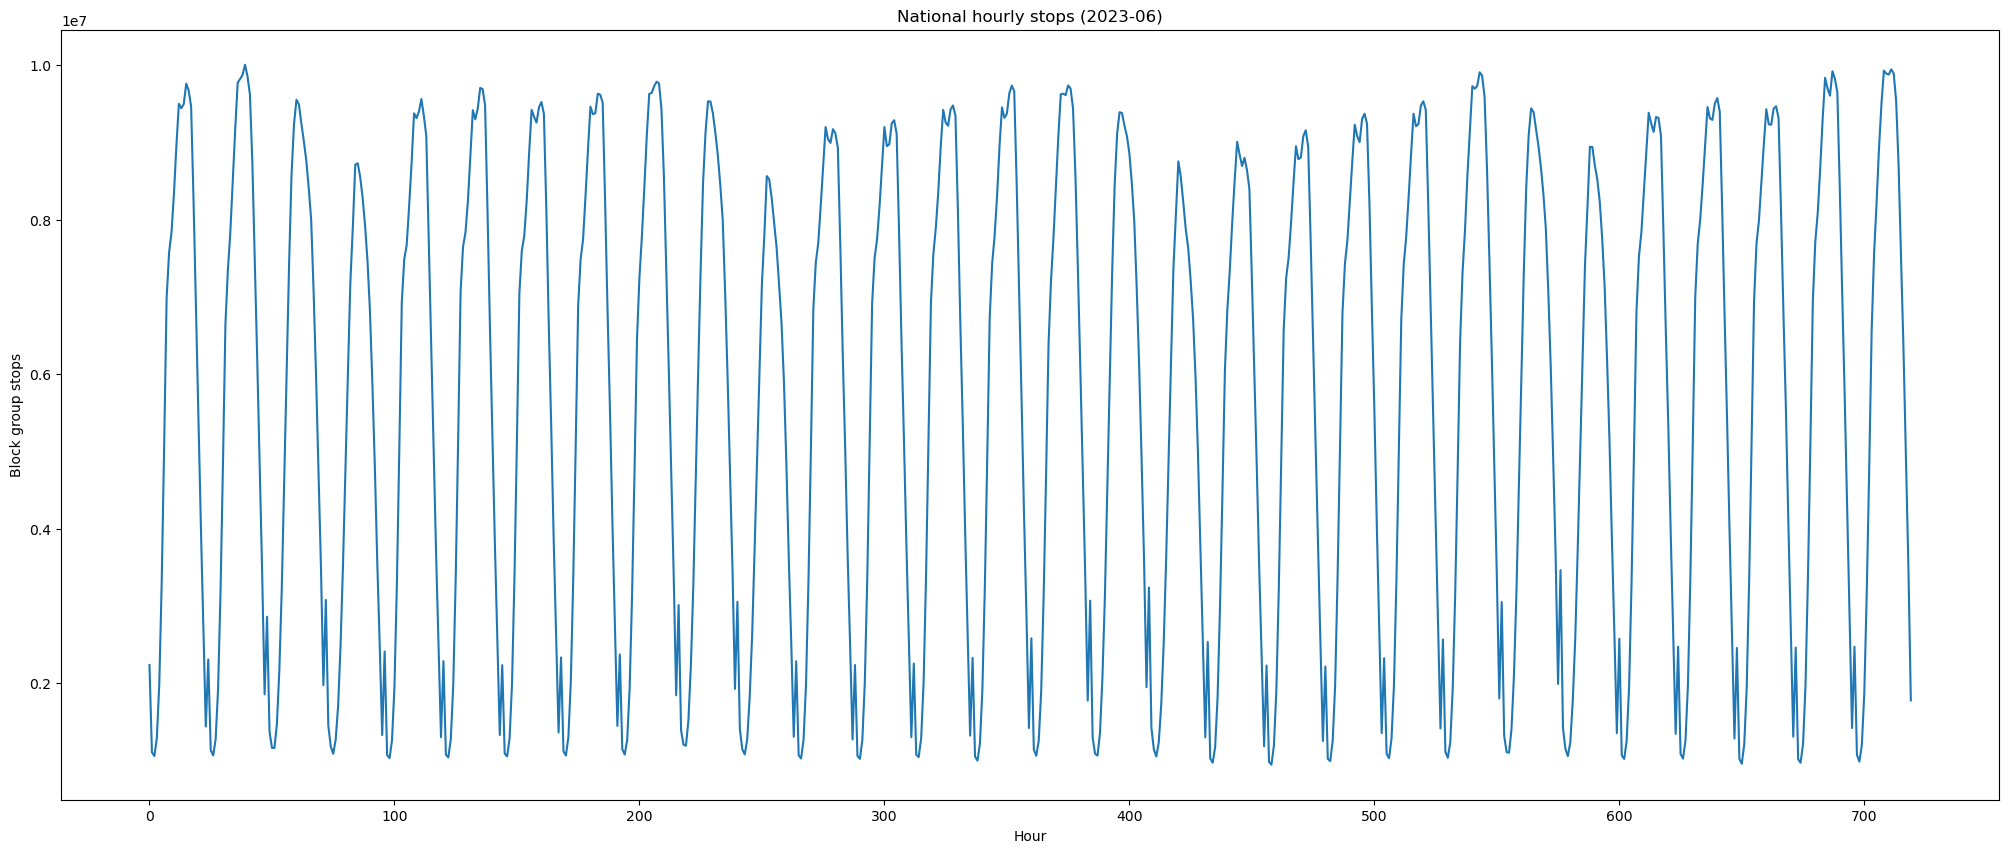

In [123]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 10))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
ax.plot(range(720), hourly_stop_arr.sum(axis=0))
ax.set_ylabel("Block group stops")
ax.set_xlabel("Hour")
ax.set_title("National hourly stops (2023-06)")

(array([24351., 20822., 17685., 14474., 11971., 10258.,  8742.,  7175.,
         6181.,  5310.,  4575.,  3952.,  3410.,  3075.,  2604.,  2324.,
         2035.,  1802.,  1688.,  1519.,  1322.,  1189.,  1047.,   992.,
          860.,   792.,   725.,   681.,   610.,   565.,   523.,   507.,
          484.,   423.,   393.,   325.,   359.,   294.,   309.,   275.,
          234.,   272.,   215.,   210.,   190.,   190.,   163.,   170.,
          176.,   143.,   130.,   134.,   131.,   121.,   112.,   106.,
           98.,    95.,    86.,    89.,    85.,    88.,    91.,    58.,
           73.,    57.,    59.]),
 array([  5000.,   7000.,   9000.,  11000.,  13000.,  15000.,  17000.,
         19000.,  21000.,  23000.,  25000.,  27000.,  29000.,  31000.,
         33000.,  35000.,  37000.,  39000.,  41000.,  43000.,  45000.,
         47000.,  49000.,  51000.,  53000.,  55000.,  57000.,  59000.,
         61000.,  63000.,  65000.,  67000.,  69000.,  71000.,  73000.,
         75000.,  77000.,  79000., 

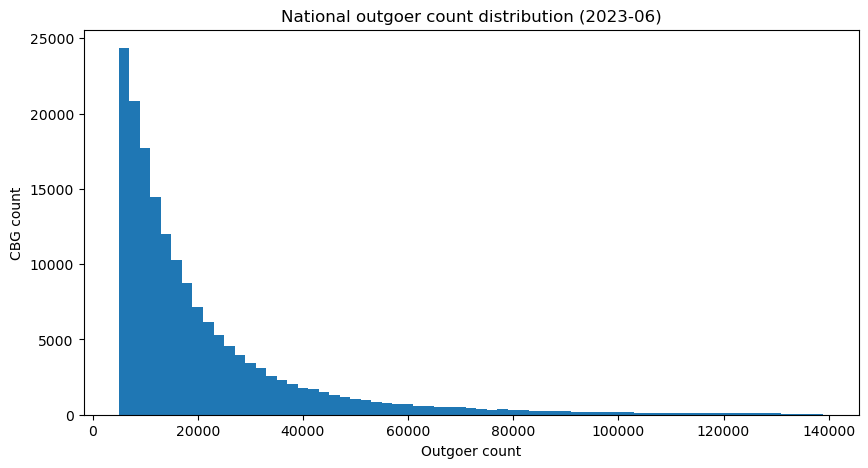

In [297]:
fig, ax = plt.subplots(figsize=(10, 5))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
# ax.plot(range(720), visit_arr.sum(axis=0))
ax.set_ylabel("CBG count")
ax.set_xlabel("Outgoer count")
ax.set_title("National outgoer count distribution (2023-06)")

ax.hist(visit_arr.sum(axis=1), bins=range(5000, 140000, 2000))

In [492]:
hourly_stop = pd.DataFrame(visit_arr.sum(axis=0), columns=['stop'])
hourly_stop

stop
0    2237409
1    1108049
2    1059332
3    1288906
4    1987266
..       ...
715  7521593
716  6323947
717  4915376
718  3514087
719  1779273

[720 rows x 1 columns]

In [493]:
hourly_stop.sum()

stop    4098763952
dtype: int64

In [494]:
hourly_stop.to_csv(r"F:\Research\Wild_fire\hourly_stops_202306.csv", index=False)

In [16]:
device_home_areas_df.groupby('destination_idx')['stop'].sum().sum()

742684880

In [8]:
99342437 / 220000

451.55653181818184

# Inspect some data

In [155]:
month_df.columns

Index(['AREA', 'AREA_TYPE', 'ORIGIN_AREA_TYPE', 'DATE_RANGE_START',
       'DATE_RANGE_END', 'DAY_COUNTS', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS',
       'STOPS_BY_DAY', 'STOPS_BY_EACH_HOUR', 'DEVICE_HOME_AREAS',
       'WEEKDAY_DEVICE_HOME_AREAS', 'WEEKEND_DEVICE_HOME_AREAS',
       'BREAKFAST_DEVICE_HOME_AREAS', 'LUNCH_DEVICE_HOME_AREAS',
       'DINNER_DEVICE_HOME_AREAS', 'NIGHTLIFE_DEVICE_HOME_AREAS',
       'WORK_HOURS_DEVICE_HOME_AREAS', 'WORK_BEHAVIOR_DEVICE_HOME_AREAS',
       'DEVICE_DAYTIME_AREAS', 'DISTANCE_FROM_HOME',
       'DISTANCE_FROM_PRIMARY_DAYTIME_LOCATION', 'MEDIAN_DWELL',
       'TOP_SAME_DAY_BRAND', 'TOP_SAME_MONTH_BRAND', 'POPULARITY_BY_EACH_HOUR',
       'POPULARITY_BY_HOUR_MONDAY', 'POPULARITY_BY_HOUR_TUESDAY',
       'POPULARITY_BY_HOUR_WEDNESDAY', 'POPULARITY_BY_HOUR_THURSDAY',
       'POPULARITY_BY_HOUR_FRIDAY', 'POPULARITY_BY_HOUR_SATURDAY',
       'POPULARITY_BY_HOUR_SUNDAY', 'DEVICE_TYPE', 'ISO_COUNTRY_CODE',
       'REGION', 'Y', 'M'],
      dtype='obje

In [191]:
month_df['stops_per_device'] = month_df['RAW_STOP_COUNTS'] / month_df['RAW_DEVICE_COUNTS']
# month_df

## Inspect the columns

In [ ]:
t_df = month_df#.sample(50)
def stops_by_each_hour_sum(row):
    STOPS_BY_EACH_HOUR_str = row['STOPS_BY_EACH_HOUR']
    hourly_stop = json.loads(STOPS_BY_EACH_HOUR_str)
    sum_stop = sum(hourly_stop)
    return sum_stop

def stops_by_day_sum(row):
    STOPS_BY_EACH_HOUR_str = row['STOPS_BY_DAY']
    hourly_stop = json.loads(STOPS_BY_EACH_HOUR_str)
    sum_stop = sum(hourly_stop)
    return sum_stop

def device_home_areas_sum(row):
    DEVICE_HOME_AREAS_str = row['DEVICE_HOME_AREAS']
    home_device_cnts = json.loads(DEVICE_HOME_AREAS_str)
    sum_home = sum(cnt for home, cnt in home_device_cnts.items())
    stop_sum = sum_home #* row['stops_per_device'] * 1.17
    return stop_sum

def popularity_by_each_hour_sum(row):
    POPULARITY_BY_EACH_HOUR_str = row['POPULARITY_BY_EACH_HOUR']
    popularity_by_each_hour = json.loads(POPULARITY_BY_EACH_HOUR_str)
    sum_stop = sum(popularity_by_each_hour)
    return sum_stop

t_df['stops_by_each_hour_sum'] = t_df.apply(stops_by_each_hour_sum, axis=1)
t_df['stops_by_day_sum'] = t_df.apply(stops_by_day_sum, axis=1)

t_df['device_home_areas_sum'] = t_df.apply(device_home_areas_sum, axis=1)
t_df['popularity_by_each_hour_sum'] = t_df.apply(popularity_by_each_hour_sum, axis=1)




In [412]:
t_df[['device_home_areas_sum', 'RAW_DEVICE_COUNTS',  'RAW_STOP_COUNTS', 'stops_by_day_sum', 'stops_by_each_hour_sum', 'popularity_by_each_hour_sum']].sum() / 1000000

device_home_areas_sum            743.530943
RAW_DEVICE_COUNTS                887.547318
RAW_STOP_COUNTS                 4145.658773
stops_by_day_sum                4142.497618
stops_by_each_hour_sum          4098.763952
popularity_by_each_hour_sum    14571.829924
dtype: float64

In [413]:
t_df['stops_per_device'] = t_df['RAW_STOP_COUNTS'] / t_df['RAW_DEVICE_COUNTS']
t_df['stops_per_device'].mean()

C:\Users\USER\.conda\envs\geo\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


nan

In [433]:
t_df['RAW_STOP_COUNTS'] = t_df['RAW_STOP_COUNTS'].astype(int)
t_df['RAW_DEVICE_COUNTS'] = t_df['RAW_DEVICE_COUNTS'].astype(int)

In [442]:
t_df['popularity_by_each_hour_sum'].sum() / 4.67 / 1000000

3120.3061935760174

In [443]:
t_df['RAW_STOP_COUNTS'].sum() /  t_df['RAW_DEVICE_COUNTS'].sum()

4.670915779839019

In [438]:
# sum((t_df['RAW_STOP_COUNTS'].dropna() / t_df['RAW_DEVICE_COUNTS'].dropna()).dropna().to_list())#.sum()

division_result = (t_df['RAW_STOP_COUNTS'].dropna() / t_df['RAW_DEVICE_COUNTS'].dropna()).dropna()
if not division_result.empty:
    result = sum(division_result)
else:
    result = 0  # or NaN, or handle it some other way
 
result



nan

## Monthly home panel

In [401]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum() #/ 330000000

45306844.0

In [405]:
t_df['RAW_STOP_COUNTS'].sum() / month_panel_df['NUMBER_DEVICES_RESIDING'].sum()

91.50182195431665

In [387]:
panel_df = pd.read_csv(f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv")


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0         2023    7     AB               CA        CA:48112029   
1         2023    7     AB               CA        CA:48170217   
2         2023    7     AB               CA        CA:48130262   
3         2023    7     AB               CA        CA:48130337   
4         2023    7     AB               CA        CA:48170330   
...        ...  ...    ...              ...                ...   
15121286  2020   12     YT               CA        CA:60010269   
15121287  2020   12     YT               CA        CA:60010203   
15121288  2020   12     YT               CA        CA:60010258   
15121289  2020   12     YT               CA        CA:60010282   
15121290  2020   12     YT               CA        CA:60010228   

          NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
0                             5.0                             NaN  
1                            16.0                             NaN  
2                             5.0                             NaN  
3                             5.0                             NaN  
4                             5.0                             NaN  
...                           ...                             ...  
15121286                     12.0                             4.0  
15121287                     12.0                             4.0  
15121288                      5.0                             5.0  
15121289                      9.0                             7.0  
15121290                     11.0                             8.0  

[15121291 rows x 7 columns]

In [391]:
month_panel_df = panel_df.query("YEAR == 2023 and MON == 6 and ISO_COUNTRY_CODE == 'US' ")
month_panel_df

YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
547544  2023    6     AK               US       020200013002   
547545  2023    6     AK               US       021880001005   
547546  2023    6     AK               US       020900011001   
547547  2023    6     AK               US       021880002003   
547548  2023    6     AK               US       021100002002   
...      ...  ...    ...              ...                ...   
812375  2023    6     WY               US       560050004001   
812376  2023    6     WY               US       560250005012   
812377  2023    6     WY               US       560319594001   
812378  2023    6     WY               US       560099566002   
812379  2023    6     WY               US       560099566001   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
547544                     18.0                             NaN  
547545                      6.0                             NaN  
547546                    664.0                           768.0  
547547                      6.0                             6.0  
547548                     18.0                             6.0  
...                         ...                             ...  
812375                    268.0                           250.0  
812376                    286.0                           250.0  
812377                    195.0                           250.0  
812378                    225.0                           250.0  
812379                    524.0                           506.0  

[220039 rows x 7 columns]

In [393]:
month_panel_df.to_csv(r'F:\Research\Wild_fire\Month_panel_202306.csv', index=False)

In [444]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum()

45306844.0

In [396]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum() / 330000000

0.13729346666666667

## Population 

In [409]:
ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
ACS_df

fips  totalpopulation  male  female  under5years  5to9years  \
0        10010201001              730   293     437           17         32   
1        10010201002             1263   614     649           98         54   
2        10010202001              835   393     442           52         89   
3        10010202002             1124   665     459           47         55   
4        10010203001             2774  1423    1351           55        258   
...              ...              ...   ...     ...          ...        ...   
220328  721537506011              883   480     403           48         78   
220329  721537506012             2523  1010    1513          227        175   
220330  721537506013              991   477     514           86         37   
220331  721537506021             1577   795     782           68         36   
220332  721537506022              648   335     313           43          0   

        10to14years  15to17years  18to24years  25to34years  ...  \
0                24           43          104           69  ...   
1               123           23          152          131  ...   
2                37           78           36           79  ...   
3                42           19          101          210  ...   
4               220           80          151          505  ...   
...             ...          ...          ...          ...  ...   
220328          120           12           79           45  ...   
220329           96           36          308          250  ...   
220330          162           76          190           53  ...   
220331           18           24           82          169  ...   
220332            0           63           51          112  ...   

        households75000to99999  households100000to124999  \
0                           19                         5   
1                           79                        19   
2                           28                        16   
3                           62                        29   
4                           75                       110   
...                        ...                       ...   
220328                       0                         0   
220329                       0                        19   
220330                      24                        18   
220331                       0                         0   
220332                       9                         0   

        households125000to149999  households150000to199999  \
0                              7                        26   
1                             39                        47   
2                              5                         0   
3                             31                        16   
4                             75                        24   
...                          ...                       ...   
220328                         0                         0   
220329                         0                         0   
220330                         0                         0   
220331                         0                         0   
220332                         0                         0   

        households200000ormore  state  state_fips  county_fips   tract_fips  \
0                           16     al           1         1001   1001020100   
1                           22     al           1         1001   1001020100   
2                            0     al           1         1001   1001020200   
3                            0     al           1         1001   1001020200   
4                            8     al           1         1001   1001020300   
...                        ...    ...         ...          ...          ...   
220328                       0     pr          72        72153  72153750601   
220329                       0     pr          72        72153  72153750601   
220330                       0     pr          72        72153  72153750601   
220331

In [447]:
ACS_df['totalpopulation'].sum() / 1000000

328.016242

In [449]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum()   / 1000000

45.306844

In [497]:
print("One device equals how many person:")
ACS_df['totalpopulation'].sum() / month_panel_df['NUMBER_DEVICES_RESIDING'].sum() 

One device equals how many person:


7.23988283094713

In [498]:
print("Devcis sampling rate:")
month_panel_df['NUMBER_DEVICES_RESIDING'].sum() / ACS_df['totalpopulation'].sum() 

Devcis sampling rate:


0.13812378229734124

In [520]:
print("Stops per device:")
month_df['RAW_STOP_COUNTS'].sum() / month_df['RAW_DEVICE_COUNTS'].sum() 

Stops per device:


4.670915779839019

In [476]:
panel_ACS_df = month_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
panel_ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2023    6     AK               US       020200013002   
1       2023    6     AK               US       021880001005   
2       2023    6     AK               US       020900011001   
3       2023    6     AK               US       021880002003   
4       2023    6     AK               US       021100002002   
...      ...  ...    ...              ...                ...   
219675  2023    6     WY               US       560050004001   
219676  2023    6     WY               US       560250005012   
219677  2023    6     WY               US       560319594001   
219678  2023    6     WY               US       560099566002   
219679  2023    6     WY               US       560099566001   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                          18.0                             NaN  020200013002   
1                           6.0                             NaN  021880001005   
2                         664.0                           768.0  020900011001   
3                           6.0                             6.0  021880002003   
4                          18.0                             6.0  021100002002   
...                         ...                             ...           ...   
219675                    268.0                           250.0  560050004001   
219676                    286.0                           250.0  560250005012   
219677                    195.0                           250.0  560319594001   
219678                    225.0                           250.0  560099566002   
219679                    524.0                           506.0  560099566001   

        totalpopulation  person_per_device  
0                   618          34.333333  
1                   818         136.333333  
2                 10016          15.084337  
3                   604         100.666667  
4                   947          52.611111  
...                 ...                ...  
219675              930           3.470149  
219676             2533           8.856643  
219677             1012           5.189744  
219678             1097           4.875556  
219679             1043           1.990458  

[219680 rows x 10 columns]

In [482]:
panel_ACS_df['person_per_device'].median()

9.328281668580177

<Axes: >

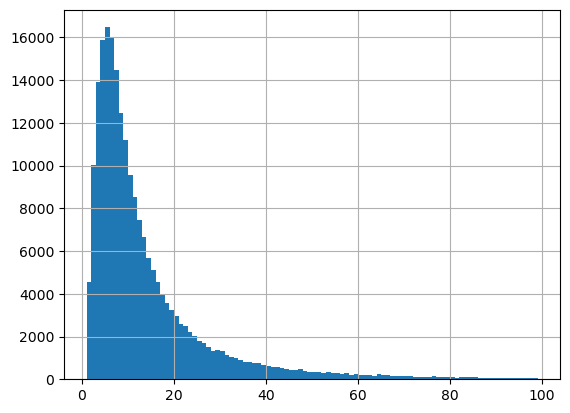

In [487]:
panel_ACS_df['person_per_device'].hist(bins=range(1, 100))

In [478]:
panel_ACS_df['NUMBER_DEVICES_RESIDING'] =  panel_ACS_df['NUMBER_DEVICES_RESIDING'].fillna(0).astype(int)
panel_ACS_df[['CBG_FIPS', 'totalpopulation', 'NUMBER_DEVICES_RESIDING', 'person_per_device']].sort_values('CBG_FIPS').to_csv(r"F:\Research\Wild_fire\person_per_device_202306.csv", index=False)
panel_ACS_df[['CBG_FIPS', 'totalpopulation', 'NUMBER_DEVICES_RESIDING', 'person_per_device']]

CBG_FIPS  totalpopulation  NUMBER_DEVICES_RESIDING  \
0       020200013002              618                       18   
1       021880001005              818                        6   
2       020900011001            10016                      664   
3       021880002003              604                        6   
4       021100002002              947                       18   
...              ...              ...                      ...   
219675  560050004001              930                      268   
219676  560250005012             2533                      286   
219677  560319594001             1012                      195   
219678  560099566002             1097                      225   
219679  560099566001             1043                      524   

        person_per_device  
0               34.333333  
1              136.333333  
2               15.084337  
3              100.666667  
4               52.611111  
...                   ...  
219675           3.470149  
219676           8.856643  
219677           5.189744  
219678           4.875556  
219679           1.990458  

[219680 rows x 4 columns]

# Tools

## IPF

### Load data

In [527]:
person_per_device = 7.24
hourly_df = pd.read_csv(r"F:\Research\Wild_fire\hourly_stops_202306.csv") * person_per_device
hourly_df.rename(columns={'stop':'outgoer'}, inplace=True)
hourly_df

outgoer
0    16198841.16
1     8022274.76
2     7669563.68
3     9331679.44
4    14387805.84
..           ...
715  54456333.32
716  45785376.28
717  35587322.24
718  25441989.88
719  12881936.52

[720 rows x 1 columns]

In [534]:
outgoer_df = pd.read_csv(r"F:\Research\Wild_fire\origin_device_202306.csv" ) #* person_per_device
outgoer_df['origin'] = outgoer_df['origin'].astype(str).str.zfill(12)

total_device = outgoer_df['device'].sum()
total_outgoer = hourly_df['outgoer'].sum()

total_device, total_outgoer, 

(742684880, 29675051012.48)

In [535]:
# let the sum of total_device = total_outgoer
outgoer_df['outgoer'] = outgoer_df['device'] / total_device * total_outgoer
outgoer_df['outgoer'].sum()

29675051012.480003

In [539]:
# ! pip install ipfn

In [548]:
seed_arr = np.ones((len(outgoer_df), len(hourly_df)))
seed_arr.shape

(220040, 720)

In [550]:
import numpy as np
from ipfn import ipfn

# m = [[40, 30, 20, 10], [35, 50, 100, 75], [30, 80, 70, 120], [20, 30, 40, 50]]
# m = np.array(m)
# xip = np.array([150, 300, 400, 150])
# xpj = np.array([200, 300, 400, 100])
# 
# aggregates = [xip, xpj]
aggregates = [np.array(outgoer_df['outgoer']), np.array(hourly_df['outgoer'])]
dimensions = [[0], [1]]

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-2)
m = IPF.iteration()
print(m)



[[ 40.21983469  19.91837326  19.04263276 ...  88.35917356  63.16949571
   31.98434704]
 [ 81.74834079  40.48484978  38.70487396 ... 179.59337445 128.394398
   65.00939951]
 [ 43.03347822  21.31179525  20.37479091 ...  94.54048234  67.58861986
   34.22186372]
 ...
 [  1.61402807   0.79932734   0.76418374 ...   3.54586705   2.53500145
    1.2835367 ]
 [  3.40254567   1.68506845   1.61098195 ...   7.47507108   5.34405712
    2.70583413]
 [  0.58890213   0.29164646   0.2788238  ...   1.2937623    0.92493296
    0.46831745]]


In [556]:
m.sum(axis=0).sum(), m.sum(axis=1).sum()

(29675051012.480015, 29675051012.48001)

In [557]:
m

array([[ 40.21983469,  19.91837326,  19.04263276, ...,  88.35917356,
         63.16949571,  31.98434704],
       [ 81.74834079,  40.48484978,  38.70487396, ..., 179.59337445,
        128.394398  ,  65.00939951],
       [ 43.03347822,  21.31179525,  20.37479091, ...,  94.54048234,
         67.58861986,  34.22186372],
       ...,
       [  1.61402807,   0.79932734,   0.76418374, ...,   3.54586705,
          2.53500145,   1.2835367 ],
       [  3.40254567,   1.68506845,   1.61098195, ...,   7.47507108,
          5.34405712,   2.70583413],
       [  0.58890213,   0.29164646,   0.2788238 , ...,   1.2937623 ,
          0.92493296,   0.46831745]])

Text(0.5, 1.0, 'National hourly stops (2023-06)')

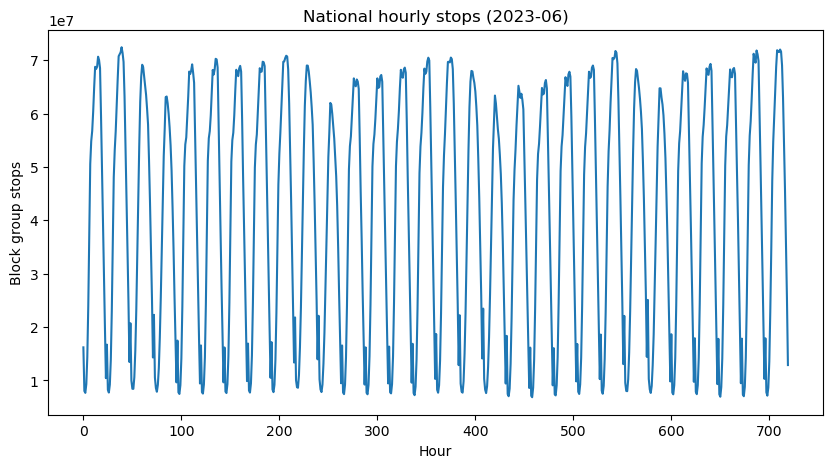

In [558]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
ax.plot(range(720), m.sum(axis=0))
ax.set_ylabel("Block group stops")
ax.set_xlabel("Hour")
ax.set_title("National hourly stops (2023-06)")

In [561]:
m

array([[ 40.21983469,  19.91837326,  19.04263276, ...,  88.35917356,
         63.16949571,  31.98434704],
       [ 81.74834079,  40.48484978,  38.70487396, ..., 179.59337445,
        128.394398  ,  65.00939951],
       [ 43.03347822,  21.31179525,  20.37479091, ...,  94.54048234,
         67.58861986,  34.22186372],
       ...,
       [  1.61402807,   0.79932734,   0.76418374, ...,   3.54586705,
          2.53500145,   1.2835367 ],
       [  3.40254567,   1.68506845,   1.61098195, ...,   7.47507108,
          5.34405712,   2.70583413],
       [  0.58890213,   0.29164646,   0.2788238 , ...,   1.2937623 ,
          0.92493296,   0.46831745]])

In [565]:
visit_arr + m#.shape

ValueError: operands could not be broadcast together with shapes (220684,720) (220040,720) 

## Process the CBG list

In [6]:
import pandas as pd
CBG_list_2019_df = pd.read_csv(r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG.csv", dtype={'GEOID':str})
CBG_list_2019_df

OID_  Shape_Length   AWATER      ALAND FUNCSTAT  Shape_Area  \
0            1      0.068291      0.0  2029249.0        S    0.000197   
1            2      0.106780  39652.0  4252428.0        S    0.000417   
2            3      0.066540      0.0  2420723.0        S    0.000235   
3            4      0.050675      0.0  1443891.0        S    0.000140   
4            5      0.036277      0.0   735392.0        S    0.000071   
...        ...           ...      ...        ...      ...         ...   
220328  220329      0.015133      0.0   139386.0        S    0.000012   
220329  220330      0.013573      0.0   109441.0        S    0.000009   
220330  220331      0.019455      0.0   199407.0        S    0.000017   
220331  220332      0.041136  48711.0   450262.0        S    0.000043   
220332  220333      0.033570      0.0   621539.0        S    0.000053   

               GEOID  BLKGRPCE  TRACTCE  COUNTYFP  STATEFP  
0       010730059033         3     5903        73        1  
1       010730059031         1     5903        73        1  
2       010730059053         3     5905        73        1  
3       010730059051         1     5905        73        1  
4       010730057023         3     5702        73        1  
...              ...       ...      ...       ...      ...  
220328  720210302002         2    30200        21       72  
220329  720210314012         2    31401        21       72  
220330  720210312021         1    31202        21       72  
220331  720531504003         3   150400        53       72  
220332  720531501044         4   150104        53       72  

[220333 rows x 11 columns]

In [8]:
CBG_list_2019_df.sort_values('GEOID')[['GEOID']].to_csv(r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv', index=False)